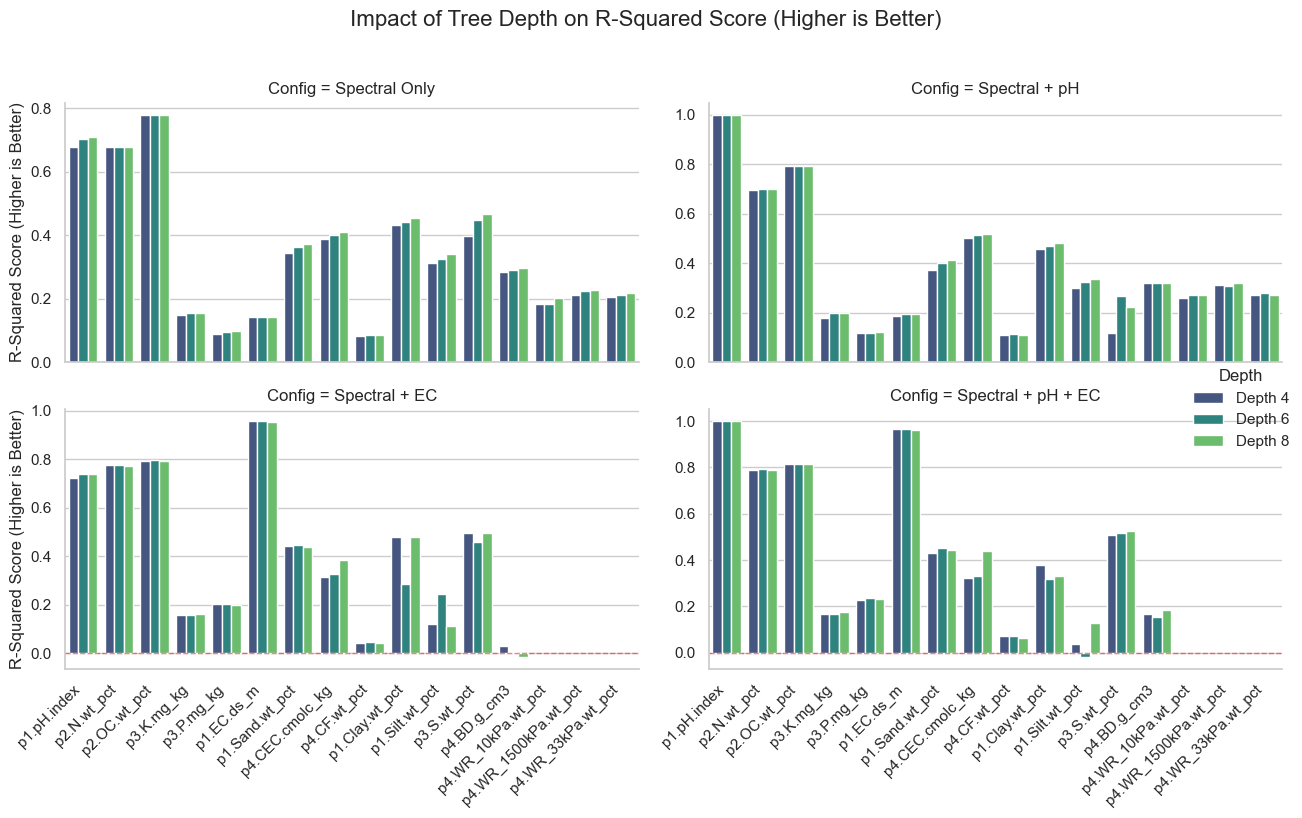

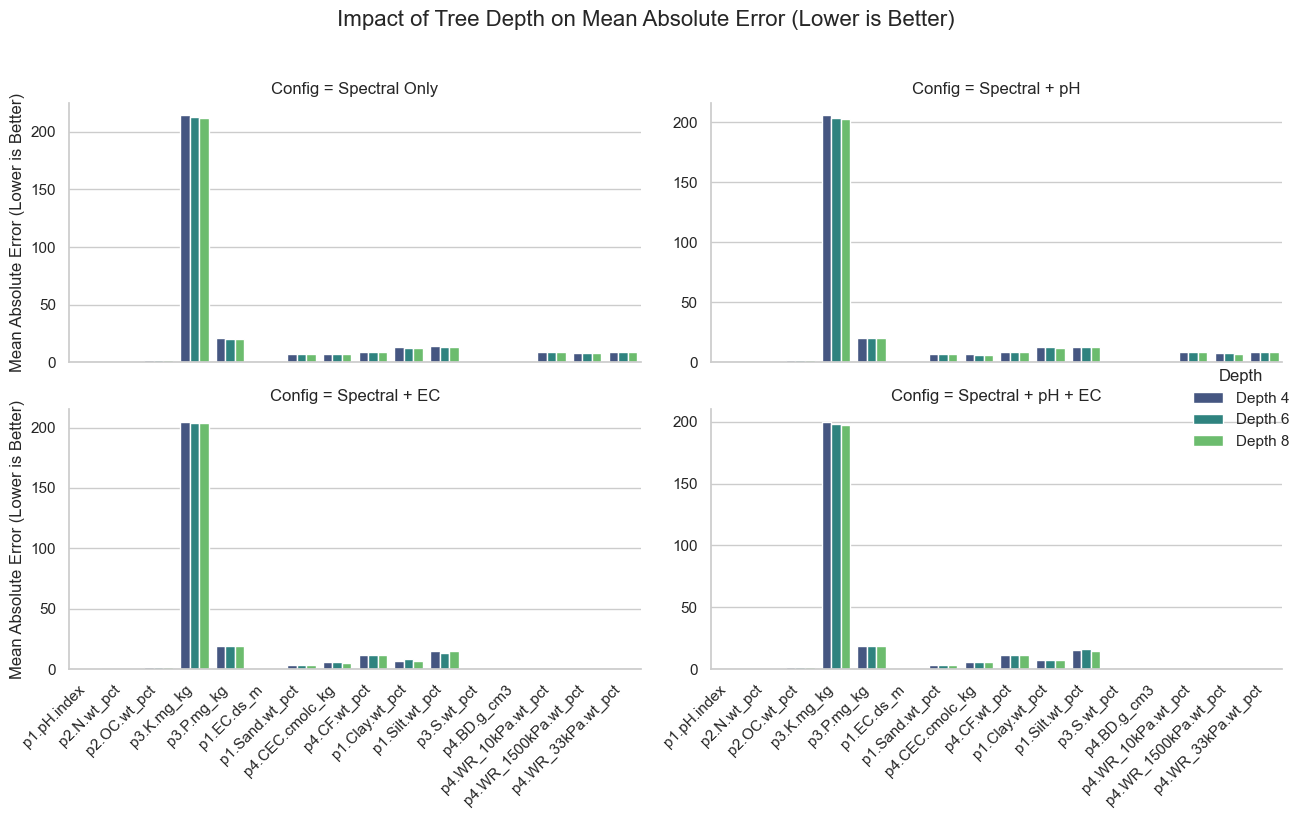

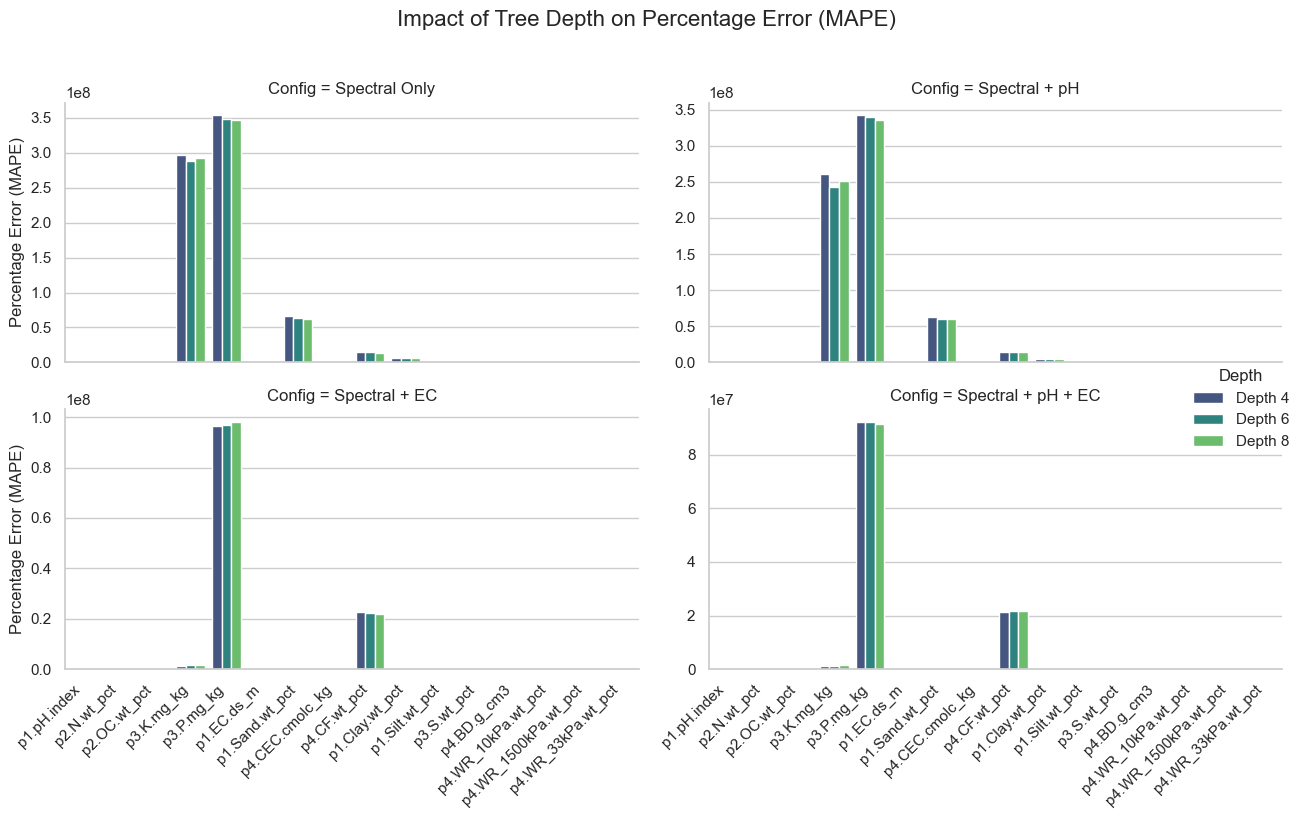

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the Data (Assuming you have these files)
xgb_4 = pd.read_csv("xgboost_dynamic_results(depth = 4).csv")
xgb_6 = pd.read_csv("xgboost_dynamic_results(depth = 6).csv")
xgb_8 = pd.read_csv("xgboost_dynamic_results(depth = 8).csv")
cnn_big = pd.read_csv("")

# 2. Label and Combine
xgb_4['Depth'] = 'Depth 4'
xgb_6['Depth'] = 'Depth 6'
xgb_8['Depth'] = 'Depth 8'

df_all = pd.concat([xgb_4, xgb_6, xgb_8], ignore_index=True)

# 3. Define a Plotting Function
def plot_metric_comparison(data, metric_col, title_metric, lower_is_better=True):
    """
    Creates a faceted bar chart comparison.
    - Rows: None
    - Columns: Configuration (Spectral, +pH, +EC, etc.)
    - X-axis: Feature Name
    - Y-axis: Metric
    - Hue: Depth
    """
    sns.set_theme(style="whitegrid")
    
    # Create the FacetGrid
    g = sns.catplot(
        data=data, 
        kind="bar",
        x="Feature", 
        y=metric_col, 
        hue="Depth", 
        col="Config", 
        col_wrap=2,       # Wraps into a 2x2 grid (since you have 4 configs)
        height=4, 
        aspect=1.5,
        palette="viridis",
        sharey=False      # Let each config have its own Y-scale (optional, change to True to compare magnitude)
    )
    
    # Customizing Titles and Labels
    g.fig.suptitle(f"Impact of Tree Depth on {title_metric}", fontsize=16, y=1.02)
    g.set_axis_labels("", title_metric)
    
    # Rotate x-axis labels if you have many features
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
    
    # Add a reference line for R2 (0.0) if relevant
    if not lower_is_better:
        for ax in g.axes.flat:
            ax.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)

    plt.tight_layout()
    plt.show()

# --- 4. Generate the 3 Plots ---

# Plot 1: R-Squared (Higher is better)
# Note: Check if your CSV column is named "R2" or "R^2"
plot_metric_comparison(df_all, metric_col="R2", title_metric="R-Squared Score (Higher is Better)", lower_is_better=False)

# Plot 2: MAE (Lower is better)
plot_metric_comparison(df_all, metric_col="MAE", title_metric="Mean Absolute Error (Lower is Better)", lower_is_better=True)

# Plot 3: MAPE / Error % (Lower is better)
# Note: Using the column name "Error_% " from your previous code
plot_metric_comparison(df_all, metric_col="Error_%", title_metric="Percentage Error (MAPE)", lower_is_better=True)

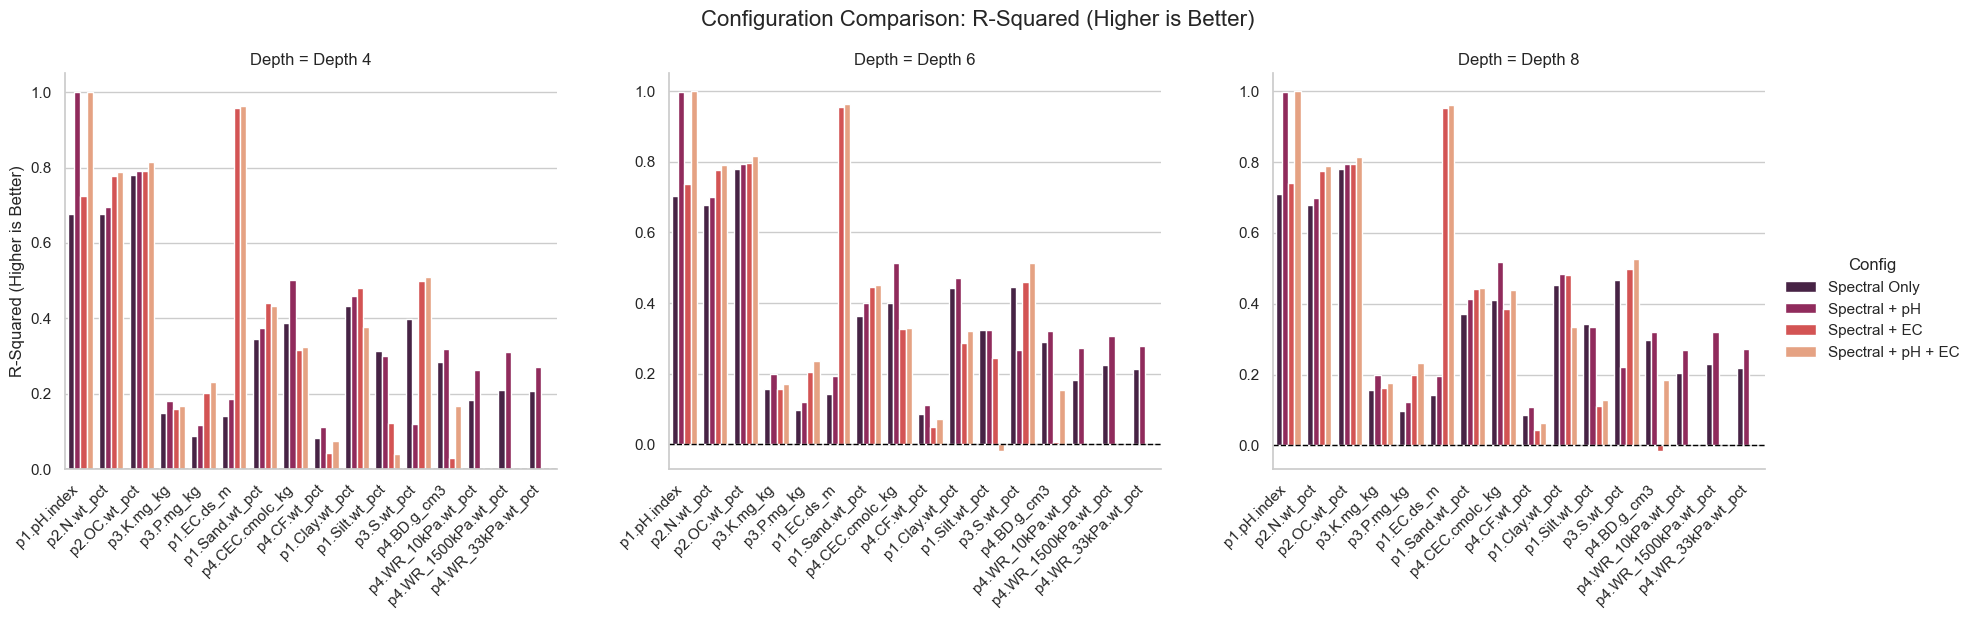

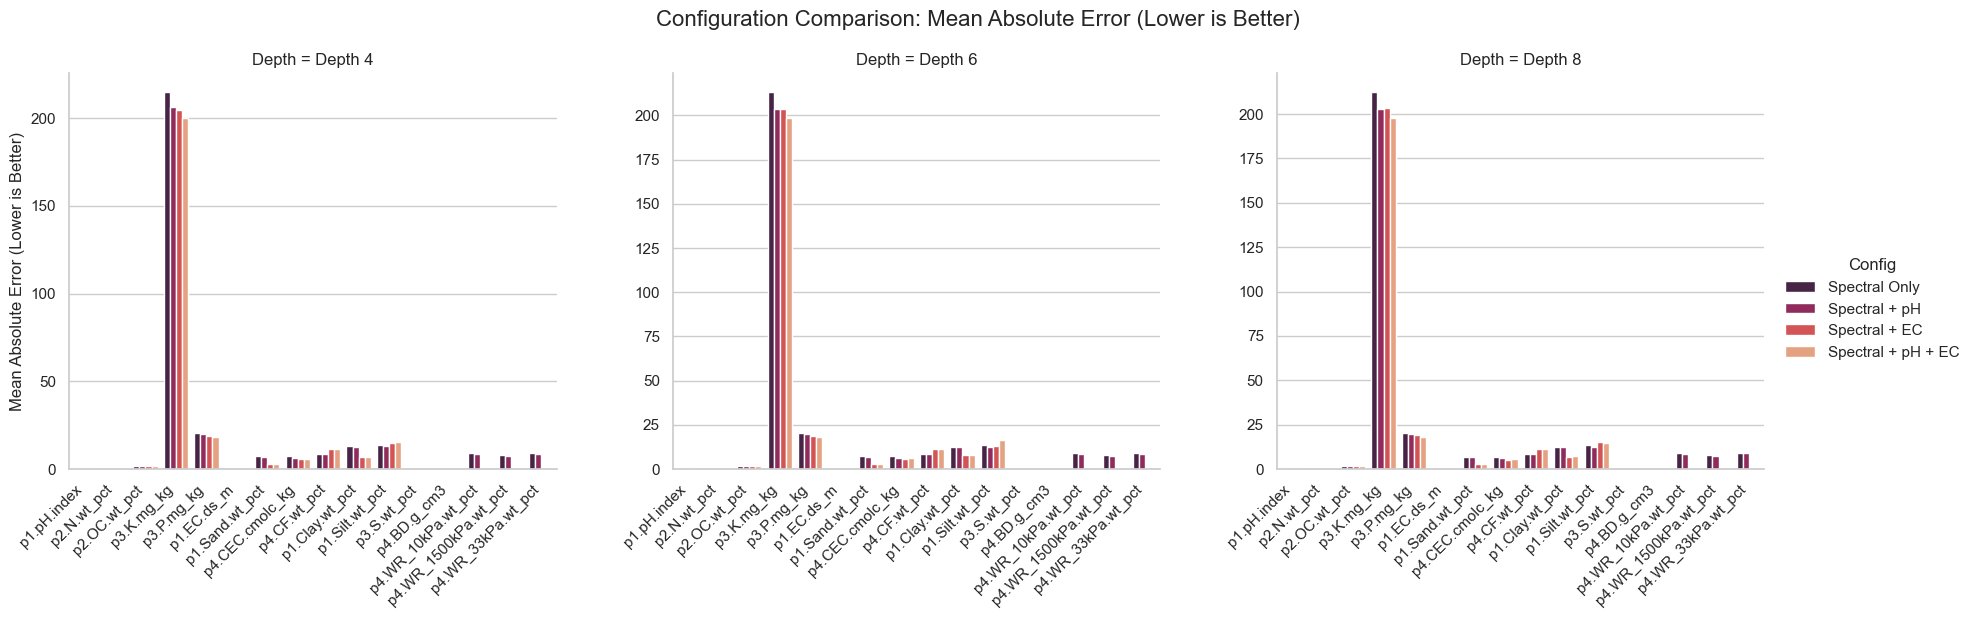

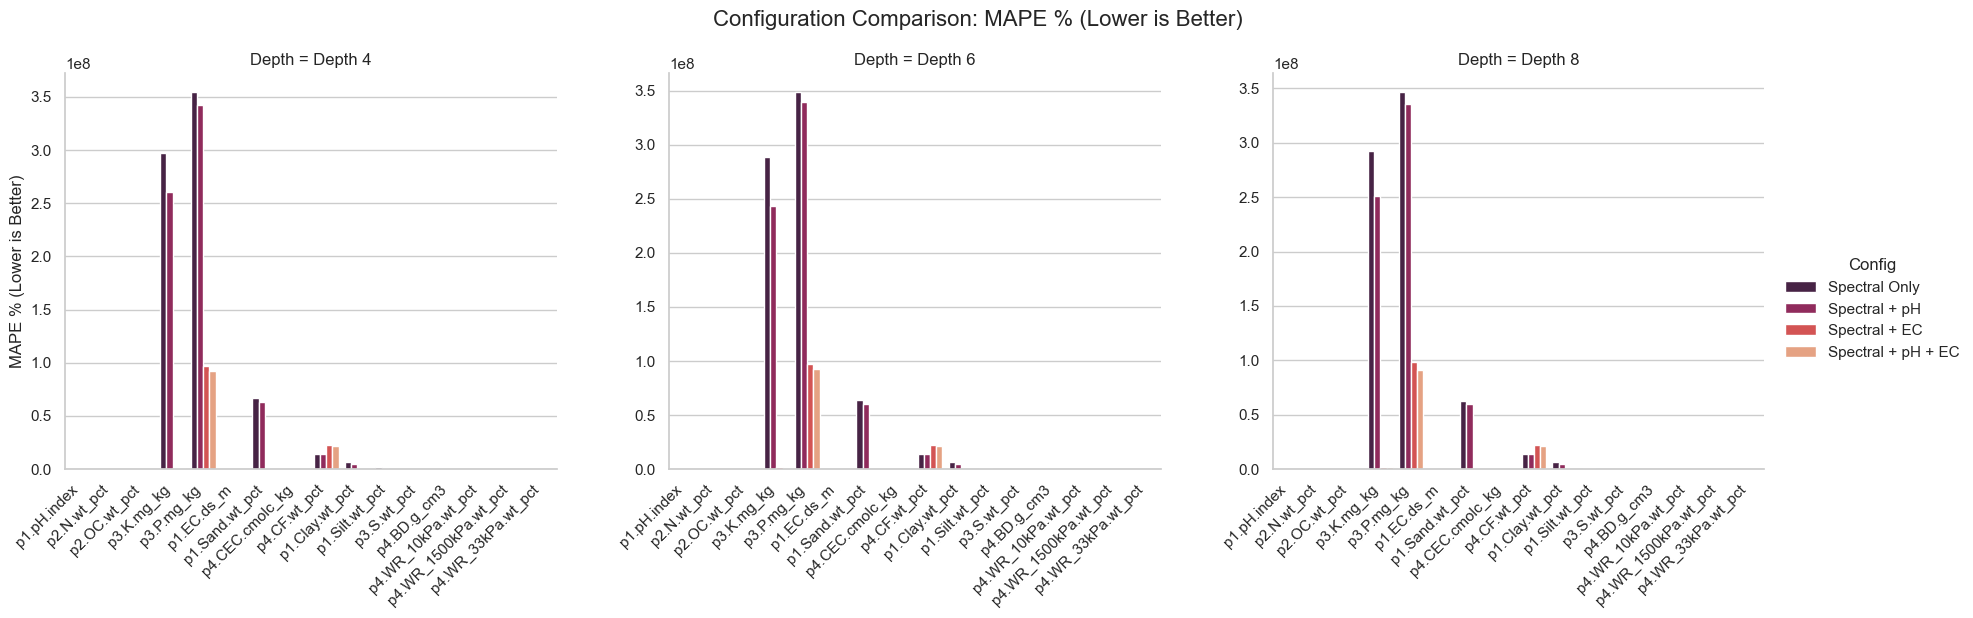

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load and Combine Data
xgb_4 = pd.read_csv("xgboost_dynamic_results(depth = 4).csv")
xgb_6 = pd.read_csv("xgboost_dynamic_results(depth = 6).csv")
xgb_8 = pd.read_csv("xgboost_dynamic_results(depth = 8).csv")
cnn_big = pd.read_csv("experiment_results_checkpoint.csv")

xgb_4['Depth'] = 'Depth 4'
xgb_6['Depth'] = 'Depth 6'
xgb_8['Depth'] = 'Depth 8'

df_all = pd.concat([xgb_4, xgb_6, xgb_8], ignore_index=True)

# 2. Define Configuration Comparison Plotter
def plot_config_comparison(data, metric_col, title_metric, lower_is_better=True):
    sns.set_theme(style="whitegrid")
    
    # Create FacetGrid
    # col="Depth": Separate plots for Depth 4, 6, 8
    # hue="Config": Different colors for each Config (Side-by-side bars)
    g = sns.catplot(
        data=data, 
        kind="bar",
        x="Feature", 
        y=metric_col, 
        hue="Config",     # <--- KEY CHANGE: Compare Configs by color
        col="Depth",      # Separate by Depth
        height=5, 
        aspect=1.2,
        palette="rocket", # Distinct colors
        sharey=False      # Each depth shares Y-axis, but you can set True if needed
    )
    
    g.fig.suptitle(f"Configuration Comparison: {title_metric}", fontsize=16, y=1.05)
    g.set_axis_labels("", title_metric)
    
    # Rotate Labels
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
            
    # Add Reference Line for R2=0
    if not lower_is_better:
        for ax in g.axes.flat:
            ax.axhline(0, color='black', linestyle='--', linewidth=1)

    plt.show()

# 3. Generate Plots
# Compare R2 (Higher is better)
plot_config_comparison(df_all, "R2", "R-Squared (Higher is Better)", lower_is_better=False)

# Compare MAE (Lower is better)
plot_config_comparison(df_all, "MAE", "Mean Absolute Error (Lower is Better)", lower_is_better=True)

# Compare Error % (Lower is better)
plot_config_comparison(df_all, "Error_%", "MAPE % (Lower is Better)", lower_is_better=True)

In [36]:
import numpy as np
import pandas as pd

# 1. Load your existing CNN results
cnn_big = pd.read_csv("experiment_results_checkpoint.csv")

# 2. LOAD YOUR ACTUAL DATA (Crucial Step!)
# Replace this with the file containing the real soil values
df_original = pd.read_csv("spectral_feature_data.csv") 

# 3. Define the function to look up the mean from the dataframe
def get_target_mean(feature_name):
    # Check if this feature exists in your original data
    if feature_name in df_original.columns:
        # Return the average value (ignoring NaNs)
        return df_original[feature_name].mean()
    else:
        print(f"Warning: Could not find '{feature_name}' in original data.")
        return np.nan

# 4. Create the 'Error_%' column
# This looks up "p2.N.wt_pct", finds the column in df_original, and gets the mean
cnn_big['Target_Mean'] = cnn_big['Feature'].apply(get_target_mean)

# Calculate Relative Error %: (MAE / Average_Value) * 100
cnn_big['Error_%'] = (cnn_big['MAE'] / cnn_big['Target_Mean']) * 100

# 5. Save the patched file
cnn_big.to_csv("experiment_results_checkpoint_patched.csv", index=False)

print("Patch complete! Now you can run the plotting code.")

Patch complete! Now you can run the plotting code.


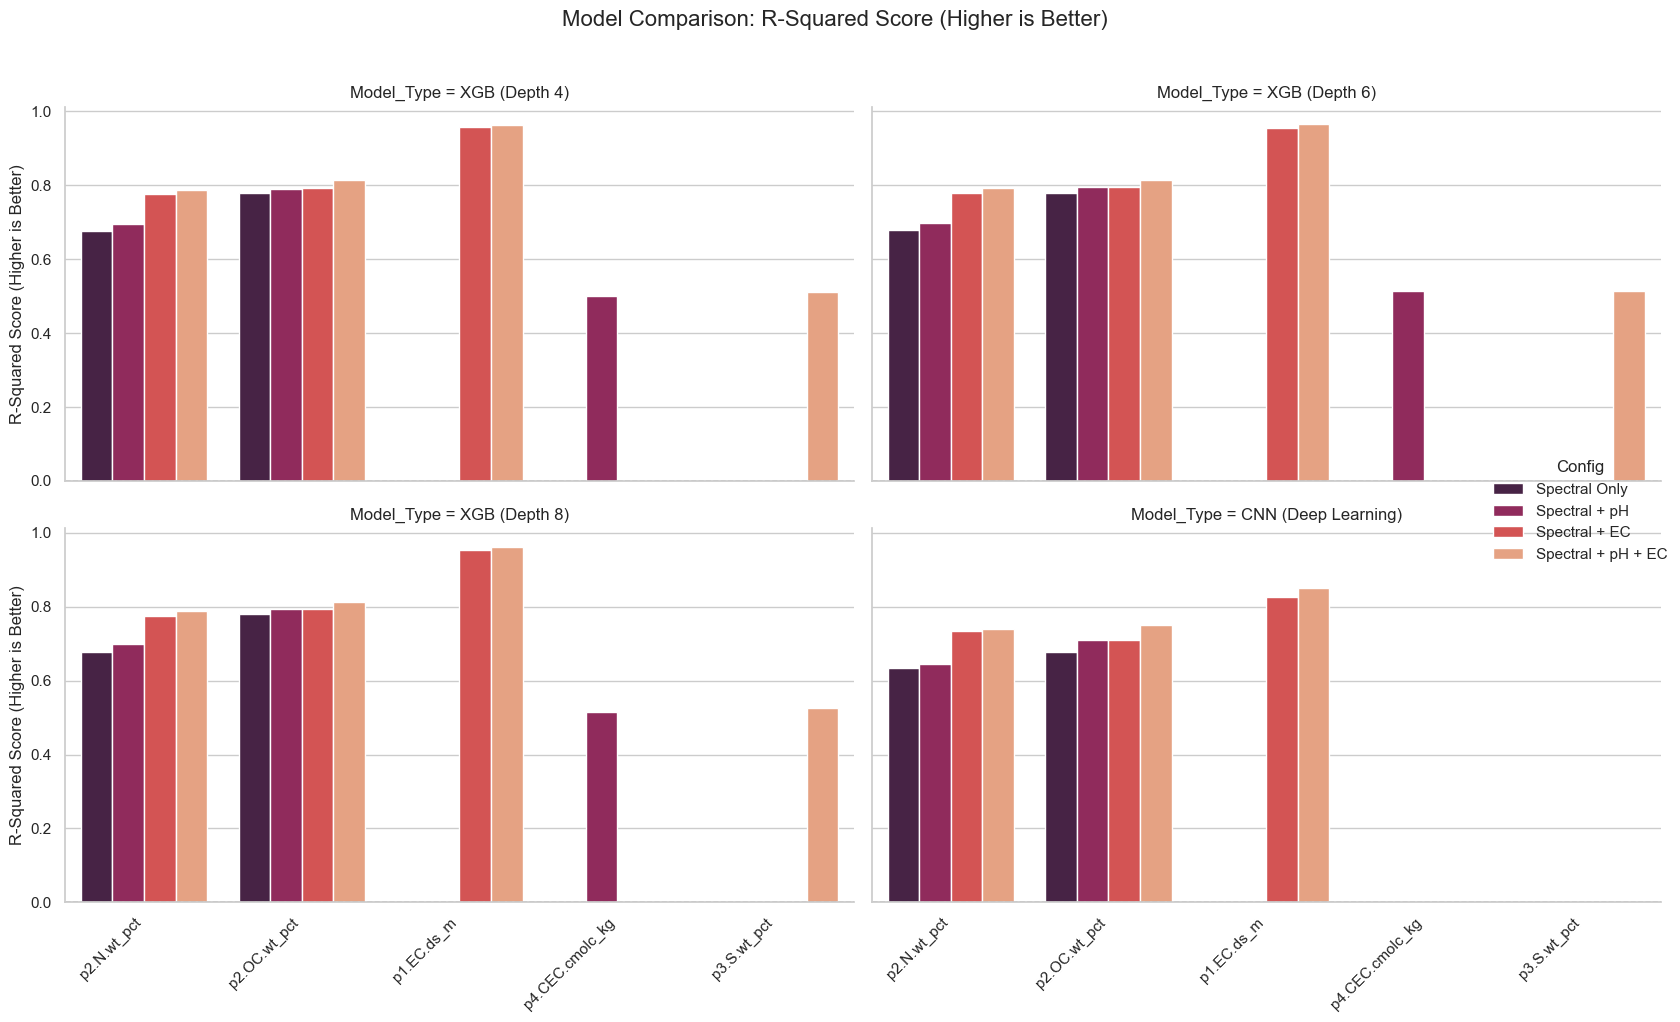

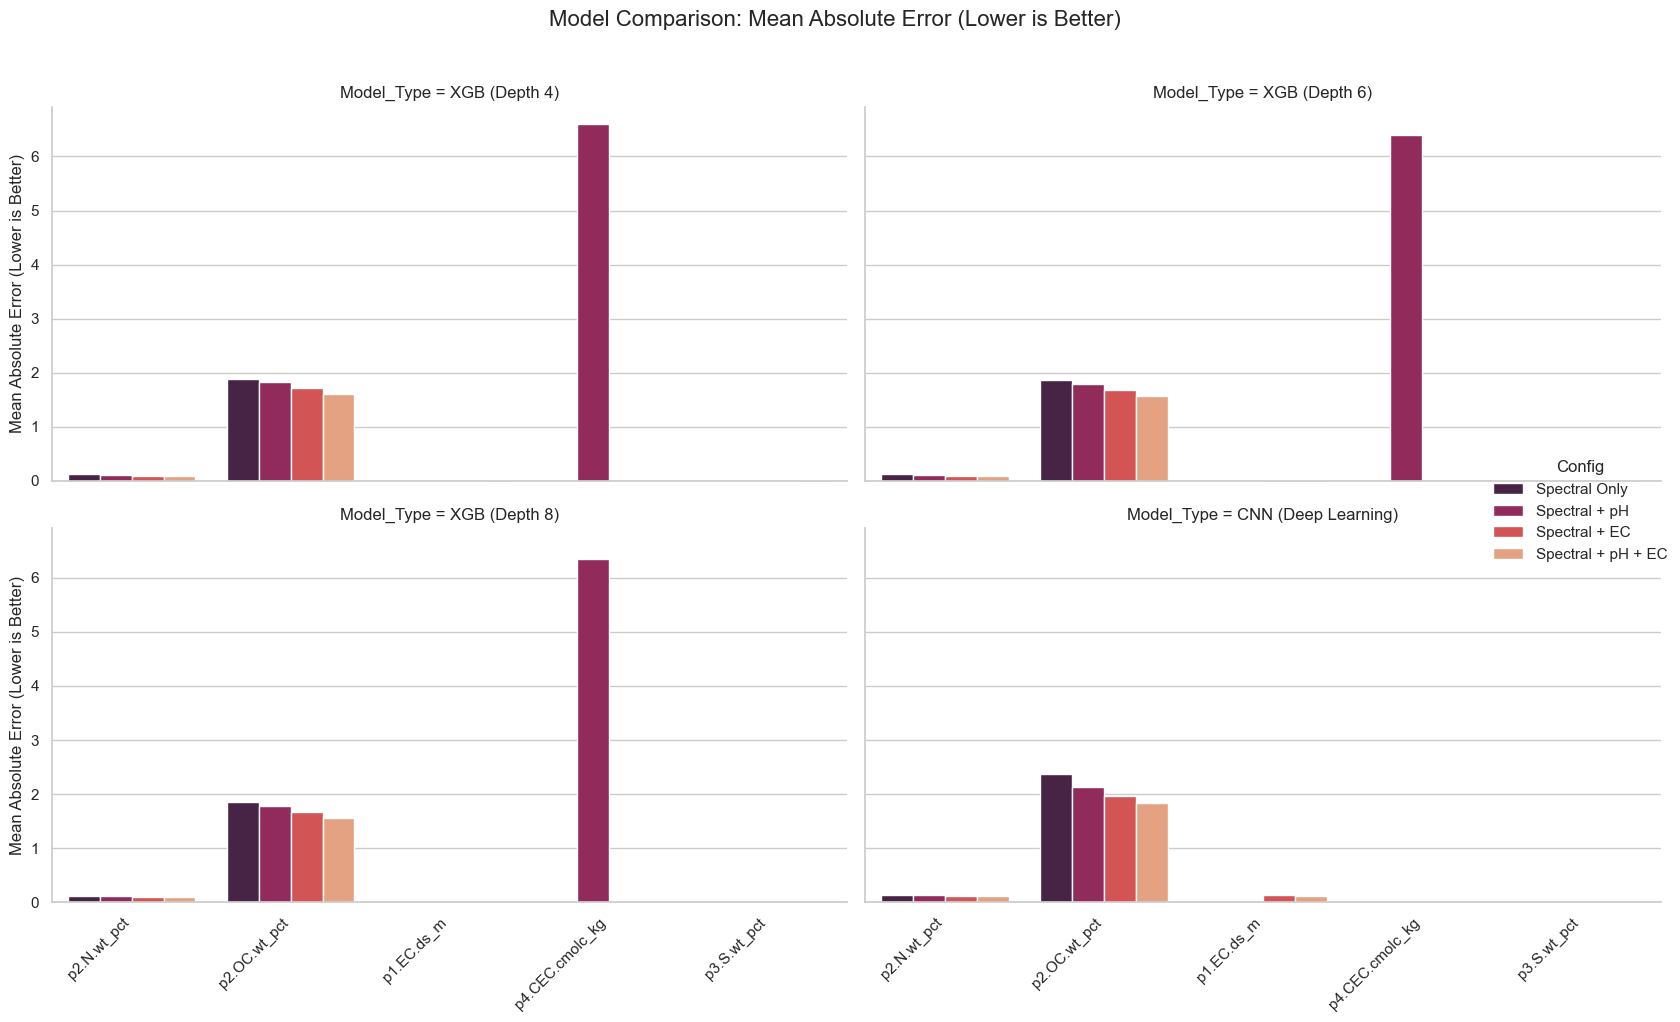

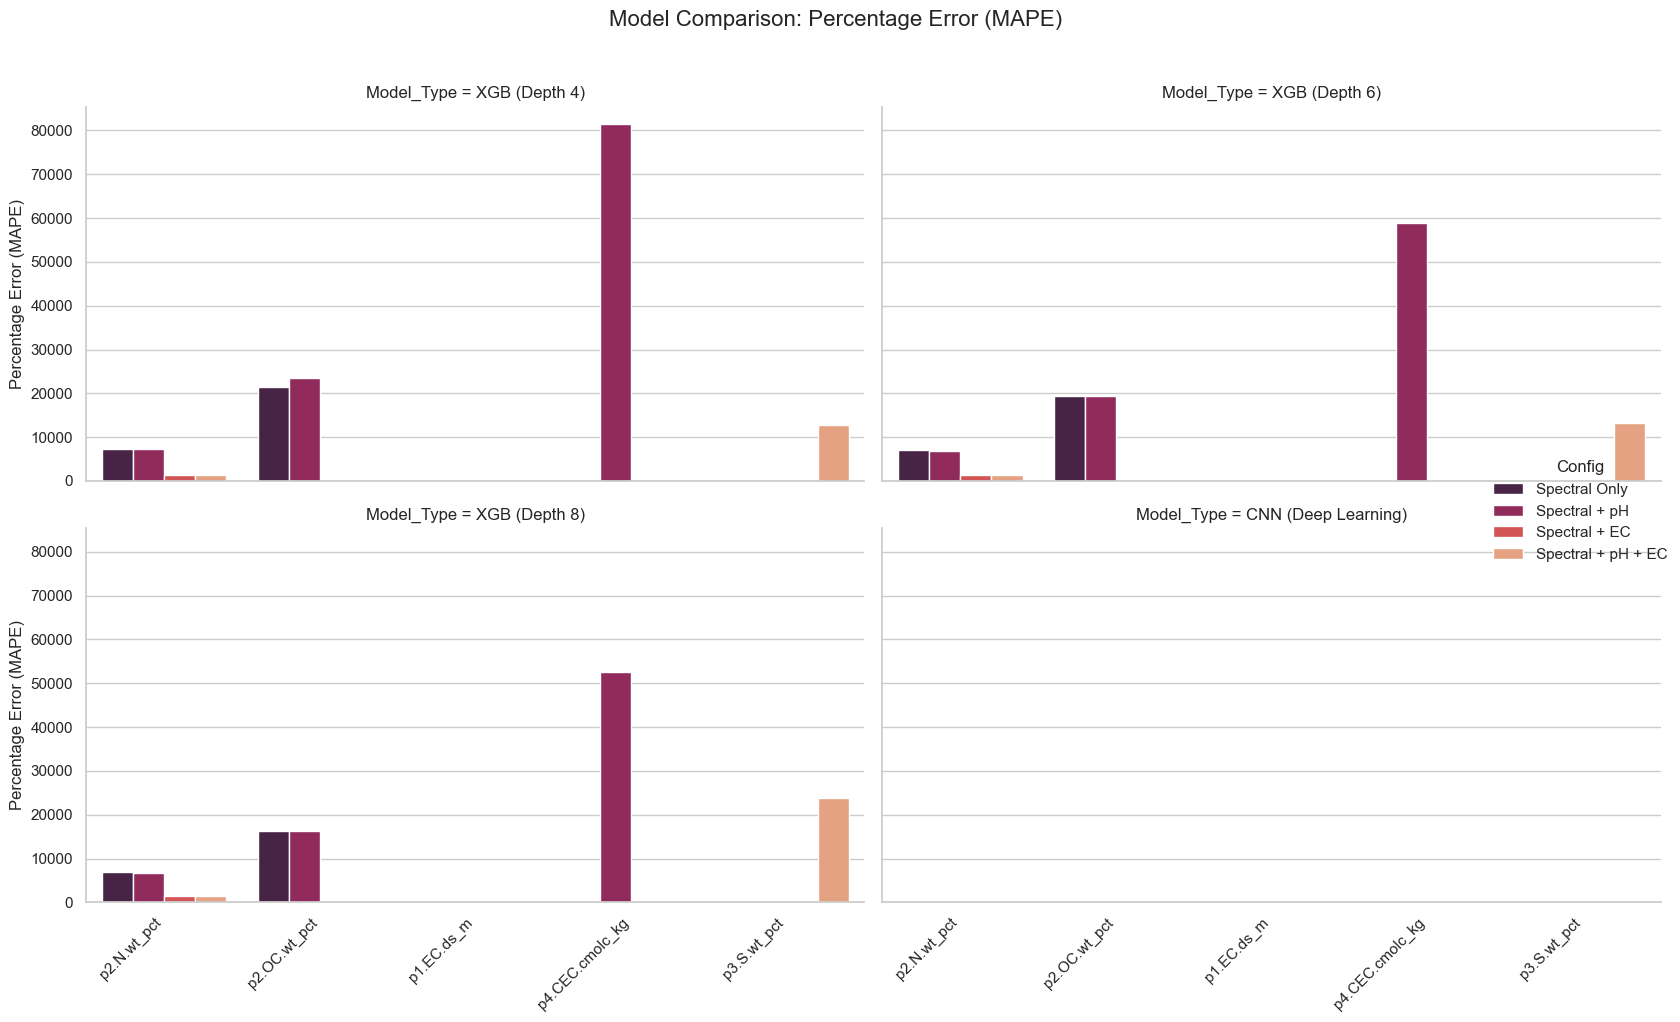

In [48]:
# 1. Load Data
# (Make sure these files are in your current folder)
xgb_4 = pd.read_csv("xgboost_dynamic_results(depth = 4).csv")
xgb_6 = pd.read_csv("xgboost_dynamic_results(depth = 6).csv")
xgb_8 = pd.read_csv("xgboost_dynamic_results(depth = 8).csv")
cnn_big = pd.read_csv("experiment_results_checkpoint_patched.csv") # Your CNN results

# 2. Add Labels to Distinguish Models
xgb_4['Model_Type'] = 'XGB (Depth 4)'
xgb_6['Model_Type'] = 'XGB (Depth 6)'
xgb_8['Model_Type'] = 'XGB (Depth 8)'
cnn_big['Model_Type'] = 'CNN (Deep Learning)'

# 3. Combine into One DataFrame
# We select only the common columns to avoid errors
common_cols = ['Feature', 'Config', 'MAE', 'R2', 'Error_%', 'Model_Type']
df_all = pd.concat([
    xgb_4[common_cols], 
    xgb_6[common_cols], 
    xgb_8[common_cols], 
    cnn_big[common_cols]
], ignore_index=True)

df_all = df_all[df_all["R2"] > 0.5]
df_all = df_all[df_all["Feature"] != "p1.pH.index"]
#df_all = df_all[df_all["Feature"] != "p1.EC.ds_m"]
# 4. Define the Plotting Function
def plot_full_benchmark(data, metric_col, title_metric, lower_is_better=True):
    """
    Facets by 'Model_Type' so you can see how each algorithm 
    responds to the 4 configurations.
    """
    sns.set_theme(style="whitegrid")
    
    # Create FacetGrid
    # col="Model_Type": Creates 4 panels (XGB-4, XGB-6, XGB-8, CNN)
    # hue="Config": Colored bars for Spectral vs. Spectral+pH etc.
    g = sns.catplot(
        data=data, 
        kind="bar",
        x="Feature", 
        y=metric_col, 
        hue="Config",     
        col="Model_Type", 
        col_wrap=2,       # 2x2 Grid Layout
        height=5, 
        aspect=1.5,
        palette="rocket"
    )
    
    # Titles and Labels
    g.fig.suptitle(f"Model Comparison: {title_metric}", fontsize=16, y=1.02)
    g.set_axis_labels("", title_metric)
    
    # Rotate Feature Labels
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
            
    # Reference Line for R2=0 (Baseline)
    if not lower_is_better:
        for ax in g.axes.flat:
            ax.axhline(0, color='black', linestyle='--', linewidth=1)

    plt.tight_layout()
    plt.show()

# --- 5. Generate the 3 Dashboard Plots ---

# A. R-Squared (Accuracy) - Higher is Better
plot_full_benchmark(df_all, "R2", "R-Squared Score (Higher is Better)", lower_is_better=False)

# B. MAE (Raw Error) - Lower is Better
plot_full_benchmark(df_all, "MAE", "Mean Absolute Error (Lower is Better)", lower_is_better=True)

# C. MAPE (Percentage Error) - Lower is Better
plot_full_benchmark(df_all, "Error_%", "Percentage Error (MAPE)", lower_is_better=True)
